# Conclusions
* Note: Line chart was preferred to scatter plot to match the charts in the starter file. The readability was also better.
* Ramicane was not in the listed four drugs that were asked for comparison. But I added it to the charts since it was one of the best two drugs.

* Capomulin and Ramicane caused the tumor volume to decrease over time. Other drugs in fact caused it to increase. 
* Ketapril and Placebo were the worst perforers among the five drugs chosen.
* Metastatic spread was the least for Capomulin and Ramicane drugs.   
* Survival rate was the best for Capomulin and Ramicane drugs and the worst for Infubinol at the end of the trial(day 45).    
* Again, total % tumor volume change was negative only for Capomulin and Ramicane drugs.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_complete = pd.merge(mouse_drug_data_df, clinical_data_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint = clinical_data_complete.groupby(["Drug", "Timepoint"])
tumor_volume_mean = drug_timepoint["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_volume_mean_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_volume_mean})

# Preview DataFrame
tumor_volume_mean_df.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = drug_timepoint["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_volume_sem_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_volume_sem})

# Preview DataFrame
tumor_volume_sem_df.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_volume_mean = tumor_volume_mean_df.pivot_table('Tumor Volume (mm3)', 'Timepoint', 'Drug')

# Preview that Reformatting worked
pivot_tumor_volume_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
#convert index into columns
pivot_tumor_volume_mean.reset_index(level=pivot_tumor_volume_mean.index.names, inplace=True)
pivot_tumor_volume_mean.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


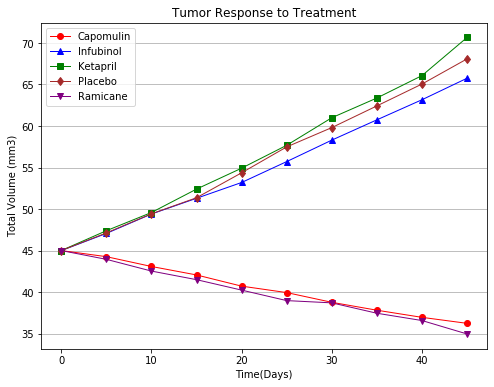

In [6]:
# Generate the Plot (with Error Bars) for Capomulin, Infubinol, Ketapril, Placebo and Ramicane
plt.figure(figsize = (8,6))

plt.plot(pivot_tumor_volume_mean['Timepoint'], pivot_tumor_volume_mean['Capomulin'], marker="o",color="red", linewidth=1, label="Capomulin")
plt.plot(pivot_tumor_volume_mean['Timepoint'], pivot_tumor_volume_mean['Infubinol'], marker="^",color="blue", linewidth=1, label="Infubinol")
plt.plot(pivot_tumor_volume_mean['Timepoint'], pivot_tumor_volume_mean['Ketapril'],  marker="s",color="green", linewidth=1, label="Ketapril")
plt.plot(pivot_tumor_volume_mean['Timepoint'], pivot_tumor_volume_mean['Placebo'],   marker="d",color="brown", linewidth=1, label="Placebo")
plt.plot(pivot_tumor_volume_mean['Timepoint'], pivot_tumor_volume_mean['Ramicane'],  marker="v",color="purple", linewidth=1, label="Ramicane")

plt.title('Tumor Response to Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Total Volume (mm3)')
plt.legend()
plt.grid(axis='y')

# Save the figure 
plt.savefig('Tumor Response to Treatment')

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_mean = drug_timepoint["Metastatic Sites"].mean()

# Convert to DataFrame
met_site_mean_df = pd.DataFrame({"Metastatic Sites": met_site_mean})

# Preview DataFrame
met_site_mean_df.reset_index()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_sem = drug_timepoint["Metastatic Sites"].sem()

# Convert to DataFrame
met_site_sem_df = pd.DataFrame({"Metastatic Sites": met_site_sem})

# Preview DataFrame
met_site_sem_df.reset_index()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [9]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_site_mean = met_site_mean_df.pivot_table('Metastatic Sites', 'Timepoint', 'Drug')

# Preview that Reformatting worked
pivot_met_site_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
#convert index into columns
pivot_met_site_mean.reset_index(level=pivot_met_site_mean.index.names, inplace=True)
pivot_met_site_mean.head(10)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


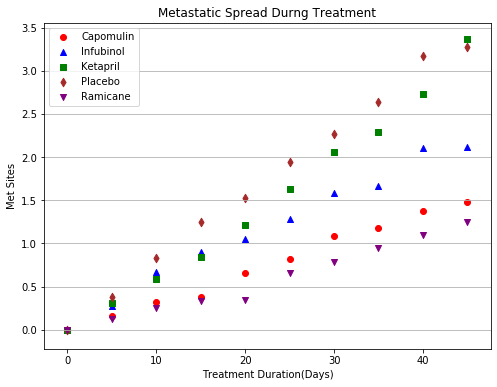

In [11]:
# Generate the Plot (with Error Bars) for Capomulin, Infubinol, Ketapril, Placebo and Ramicane
plt.figure(figsize = (8,6))

plt.scatter(pivot_met_site_mean['Timepoint'], pivot_met_site_mean['Capomulin'], marker="o",color="red", linewidth=1, label="Capomulin")
plt.scatter(pivot_met_site_mean['Timepoint'], pivot_met_site_mean['Infubinol'], marker="^",color="blue", linewidth=1, label="Infubinol")
plt.scatter(pivot_met_site_mean['Timepoint'], pivot_met_site_mean['Ketapril'],  marker="s",color="green", linewidth=1, label="Ketapril")
plt.scatter(pivot_met_site_mean['Timepoint'], pivot_met_site_mean['Placebo'],   marker="d",color="brown", linewidth=1, label="Placebo")
plt.scatter(pivot_met_site_mean['Timepoint'], pivot_met_site_mean['Ramicane'],   marker="v",color="purple", linewidth=1, label="Ramicane")

#plt.errorbar(pivot_met_site_mean['Timepoint'], pivot_met_site_mean['Capomulin'])

plt.title('Metastatic Spread Durng Treatment')
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Met Sites')
plt.legend()
plt.grid(axis='y')

# Save the figure 
plt.savefig('Metastatic Spread Durng Treatment')

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (We can pass any metric)
#drug_timepoint = clinical_data_complete.groupby(["Drug", "Timepoint"])

mice_count = drug_timepoint["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mice Count": mice_count})

# Preview DataFrame
mice_count_df.reset_index()

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [13]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice_count_df = mice_count_df.pivot_table('Mice Count', 'Timepoint', 'Drug')

# Preview that Reformatting worked
pivot_mice_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
#convert index into columns
pivot_mice_count_df.reset_index(level=pivot_mice_count_df.index.names, inplace=True)
pivot_mice_count_df.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


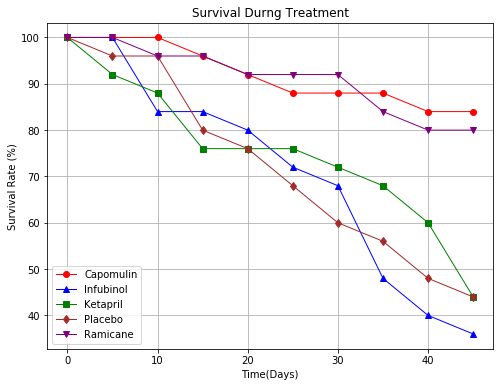

In [15]:
# Generate the Plot (Accounting for percentages) for Capomulin, Infubinol, Ketapril, Placebo and Ramicane
plt.figure(figsize = (8,6))

plt.plot(pivot_mice_count_df['Timepoint'], pivot_mice_count_df['Capomulin']*4, marker="o",color="red", linewidth=1, label="Capomulin")
plt.plot(pivot_mice_count_df['Timepoint'], pivot_mice_count_df['Infubinol']*4, marker="^",color="blue", linewidth=1, label="Infubinol")
plt.plot(pivot_mice_count_df['Timepoint'], pivot_mice_count_df['Ketapril']*4,  marker="s",color="green", linewidth=1, label="Ketapril")
plt.plot(pivot_mice_count_df['Timepoint'], pivot_mice_count_df['Placebo']*4,   marker="d",color="brown", linewidth=1, label="Placebo")
plt.plot(pivot_mice_count_df['Timepoint'], pivot_mice_count_df['Ramicane']*4,  marker="v",color="purple", linewidth=1, label="Ramicane")

plt.title('Survival Durng Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.grid(True)

# Save the figure 
plt.savefig('Survival Durng Treatment')

# Show the Figure
plt.show()

## Summary Bar Graph

In [51]:
# Calculate the percent changes for each drug

# percent change from day 45 to 0
percent_change_by_drug = pivot_tumor_volume_mean.pct_change(periods=9)*100

# keep only the row with percent change
percent_change_by_drug = percent_change_by_drug.iloc[[-1], 1:11]

# data munging
percent_change_by_drug_t = percent_change_by_drug.transpose()
percent_change_by_drug.reset_index()
percent_change_by_drug_t.columns = ['% Tumor Volume Change']

# Display the data to confirm
percent_change_by_drug_t.head()


,% Tumor Volume Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


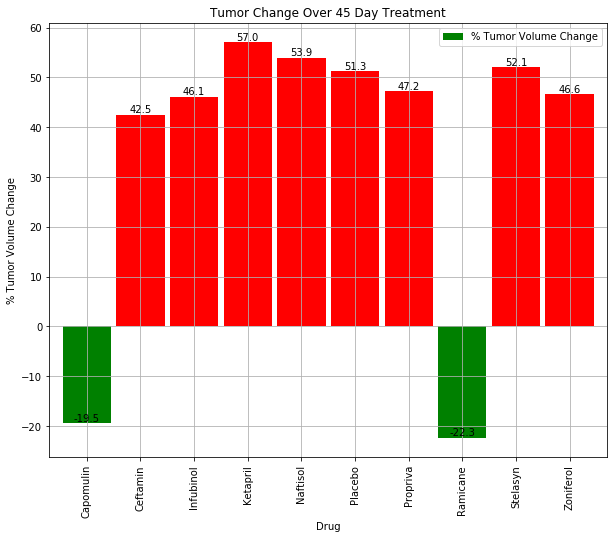

In [60]:
data = percent_change_by_drug_t
def bar_color(df,color1,color2):
    return np.where(df.values>0,color1,color2).T


data.plot.bar(width= 0.9,  figsize=(10,8), color=bar_color(data,'r','g'), title ='Tumor Change Over 45 Day Treatment',
        grid= True, legend=True )

s=percent_change_by_drug_t['% Tumor Volume Change']

for i in range(len(s)):
    plt.annotate(str(s[i].round(1)), xy=(i,s[i]),  ha='center', va='bottom')

plt.ylabel('% Tumor Volume Change')
    
# Save the figure 
plt.savefig('Tumor Change Over 45 Day Treatment RedGreen')

# Show the Figure
plt.show()

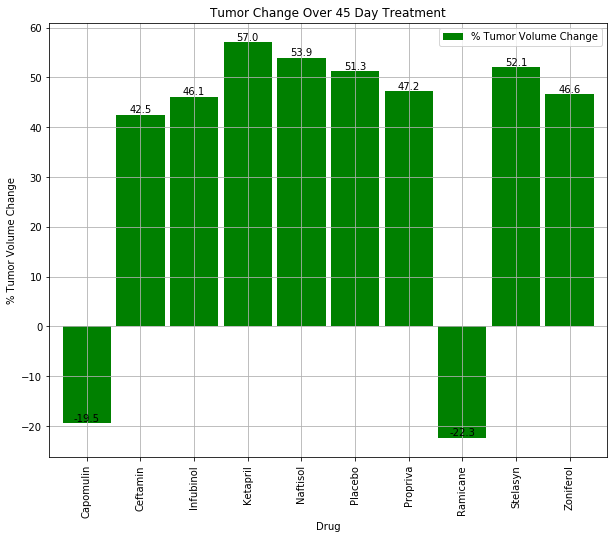

In [61]:
percent_change_by_drug_t.plot.bar(width= 0.9,  figsize=(10,8), color=('green'))

plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.legend()
plt.grid(True)

s=percent_change_by_drug_t['% Tumor Volume Change']

for i in range(len(s)):
    plt.annotate(str(s[i].round(1)), xy=(i,s[i]),  ha='center', va='bottom')

# Save the figure 
plt.savefig('Tumor Change Over 45 Day Treatment Single Color')

# Show the Figure
plt.show()